In [ ]:
# Google Drive মাউন্ট
from google.colab import drive
drive.mount('/content/drive')

# প্রয়োজনীয় লাইব্রেরি ইনস্টল ও ইমপোর্ট
import pandas as pd
import numpy as np
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import requests
from io import BytesIO
from PIL import Image

# ডেটাসেট লোড করুন
data = pd.read_excel('/content/drive/My Drive/tajul.xlsx')  # আপনার ফাইলের সঠিক পাথ দিন

# ইমেজ ডাউনলোডের জন্য ফাংশন
def download_images(image_links):
    downloaded_image_paths = []
    for link in image_links:
        try:
            response = requests.get(link)
            img = Image.open(BytesIO(response.content)).resize((299, 299))  # InceptionV3 জন্য সাইজ
            img_path = f"/content/drive/My Drive/temp_image_{len(downloaded_image_paths)}.jpg"
            img.save(img_path)
            downloaded_image_paths.append(img_path)
        except Exception as e:
            print(f'Error downloading image from {link}: {e}')
    return downloaded_image_paths

# PictureLink থেকে ইমেজ ডাউনলোড করুন
downloaded_image_paths = download_images(data['PictureLink'])


Mounted at /content/drive


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━

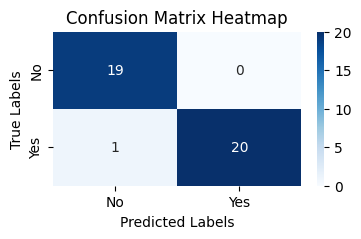

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
import numpy as np

# ইমেজ ফিচার এক্সট্র্যাক্ট করার ফাংশন
def extract_features(image_paths):
    model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
    features = []
    for path in image_paths:
        try:
            img = image.load_img(path, target_size=(299, 299))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)
            feature = model.predict(img_array)
            features.append(feature.flatten())
        except Exception as e:
            print(f'Error loading image from {path}: {e}')
            features.append(np.zeros(2048))  # যদি সমস্যা হয়, শূন্য ভেক্টর যুক্ত করুন
    return np.array(features)

# ডেটাসেট লোড করুন
data = pd.read_excel('/content/drive/My Drive/tajul.xlsx')  # আপনার ফাইলের সঠিক পাথ দিন

# সংখ্যাত্মক ডেটা প্রি-প্রসেসিং
X_numeric = data[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Qchat-10-Score']]
y = data['Class/ASD Traits']  # টার্গেট ভ্যারিয়েবল

# ডেটা ট্রেন এবং টেস্ট সেটে ভাগ করুন
if downloaded_image_paths:  # যদি কোনো ইমেজ ডাউনলোড হয়ে থাকে
    image_features = extract_features(downloaded_image_paths)

    # সংখ্যাত্মক ডেটার স্কেলিং
    scaler = StandardScaler()
    X_numeric = scaler.fit_transform(X_numeric)

    # সংখ্যাত্মক এবং ইমেজ ফিচার একত্রিত করুন
    X_combined = np.hstack((X_numeric, image_features))

    # ডেটা ট্রেন এবং টেস্ট সেটে ভাগ করুন
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

    # মডেল তৈরি করুন
    log_reg = LogisticRegression()
    random_forest = RandomForestClassifier()
    gradient_boost = GradientBoostingClassifier()
    svm_model = SVC(probability=True)
    knn_model = KNeighborsClassifier()

    # Voting Classifier তৈরি করুন
    voting_classifier = VotingClassifier(estimators=[
        ('log_reg', log_reg),
        ('random_forest', random_forest),
        ('gradient_boost', gradient_boost),
        ('svm', svm_model),
        ('knn', knn_model)
    ], voting='soft')

    # Voting Classifier প্রশিক্ষণ
    voting_classifier.fit(X_train, y_train)

    # প্রেডিকশন করুন
    y_pred = voting_classifier.predict(X_test)

    # পারফরম্যান্স মূল্যায়ন
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # ফলাফল প্রিন্ট করুন
    print(f'Ensemble Model Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

    # Confusion Matrix ber korun
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Confusion Matrix heatmap visualize korun
    plt.figure(figsize=(4, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=voting_classifier.classes_, yticklabels=voting_classifier.classes_)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

else:
    print("No images were downloaded. Please check the links.")
